In [1]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset

df=pd.read_csv('USA_COVID_19.csv',parse_dates=['Last_Update'])
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
#checking the shape of dataset
df.shape

(58, 18)

Observation:
    
    This data set consist of 58 rows and 18 columns.

In [4]:
#Checking the columns of the datset
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

These are the columns present in the dataset.

In [5]:
#Checking the data type of the columns.
df.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

This dataset consist of three types of data type:
    
    Object , Numeric and datetime.

In [6]:
#Checking the information present in the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
Province_State          58 non-null object
Country_Region          58 non-null object
Last_Update             58 non-null datetime64[ns]
Lat                     56 non-null float64
Long_                   56 non-null float64
Confirmed               58 non-null int64
Deaths                  58 non-null int64
Recovered               42 non-null float64
Active                  58 non-null float64
FIPS                    58 non-null int64
Incident_Rate           56 non-null float64
People_Tested           56 non-null float64
People_Hospitalized     33 non-null float64
Mortality_Rate          57 non-null float64
UID                     58 non-null int64
ISO3                    58 non-null object
Testing_Rate            56 non-null float64
Hospitalization_Rate    33 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(4), object(3)
memory usage: 8.2+ KB


Finding:

    1. Dataset having 58 rows with 18 features.
    
    2. Missing value present in many features.
    
    3. No missing values in Province_State, Country_Region, Last_Update, Confirmed, Deaths, Active, FIPS, UID, ISO3.
    
    4. There are three object type data type, one is datetime and other all are numeric data type.

## Checking the missing value

In [7]:
#Checking if there is any missing value present in our dataset.
df.isnull().values.any()

True

Now it shows True means missing value present in our dataset.

In [8]:
#Now check for columns where missing values are present.
df.isnull().any()

Province_State          False
Country_Region          False
Last_Update             False
Lat                      True
Long_                    True
Confirmed               False
Deaths                  False
Recovered                True
Active                  False
FIPS                    False
Incident_Rate            True
People_Tested            True
People_Hospitalized      True
Mortality_Rate           True
UID                     False
ISO3                    False
Testing_Rate             True
Hospitalization_Rate     True
dtype: bool

Observation:
    
    The True value shows that missing value is present in these columns.
    
    The False value shows that missing value is not present in these columns

In [9]:
#Now checking the Number of missing value present
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

The numbers shows that the number of missing value present in particular columns.

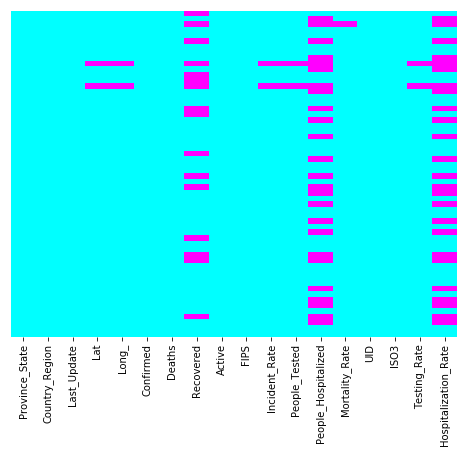

In [10]:
#Seeing it via heatmap(visualization)

plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cool')
plt.show()

Finding:
    
     Missing value present in numeric columns than fill with mean or median.

In [11]:
#Filling the missing values by mean in numeric columns

df['Lat'].fillna(df['Lat'].mean(),inplace=True)
df['Long_'].fillna(df['Long_'].mean(),inplace=True)

df['Recovered'].fillna(df['Recovered'].mean(),inplace=True)
df['People_Tested'].fillna(df['People_Tested'].mean(),inplace=True)

df['People_Hospitalized'].fillna(df['People_Hospitalized'].mean(),inplace=True)
df['Mortality_Rate'].fillna(df['Mortality_Rate'].mean(),inplace=True)

df['Testing_Rate'].fillna(df['Testing_Rate'].mean(),inplace=True)
df['Hospitalization_Rate'].fillna(df['Hospitalization_Rate'].mean(),inplace=True)
df['Incident_Rate'].fillna(df['Incident_Rate'].mean(),inplace=True)

In [12]:
#After fillup missing value check again the columns
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

No missing value is present.

All the values are filled by mean.

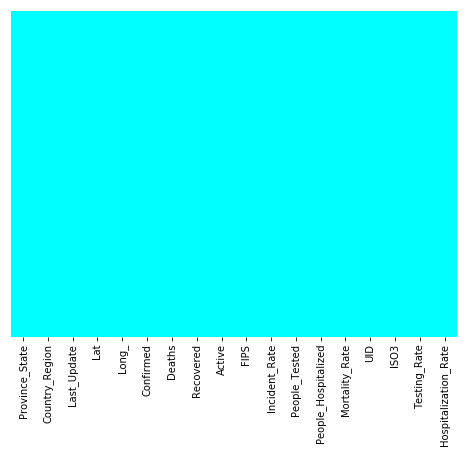

In [13]:
#Seeing it via heatmap(visualization)

plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cool')
plt.show()

Now all the missing values are filled and our data is clean.

## Summary Statistics

In [14]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,1898.951207,3.781861
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963
50%,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,3501.526835,14.342541
75%,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


Observation:

    1. Mean is greater than median in all features means all data are right skewed in all numerical feature.
    
    2. Min values for Deaths and Active are zero means cities that have not been affected by the pandemic.
    
    3. Lat and Long_ consists of -ve values.
    
    4. Difference between 75 % and max is very large in all columns that means outliers present which needs to be removed.

## To check the correlation

In [15]:
df_cor=df.corr()
df_cor

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,2.645628e-02,-0.134906,7.727677e-01,0.309579,-6.625465e-02
Long_,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,7.967739e-02,0.297192,-5.259975e-01,0.190191,7.138145e-02
Confirmed,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,8.692673e-01,0.382537,1.539717e-01,0.332464,2.874708e-01
Deaths,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,9.082786e-01,0.427127,1.200429e-01,0.344465,2.982254e-01
Recovered,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,7.618294e-01,0.322160,1.303142e-01,0.220597,2.316917e-01
Active,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,8.359377e-01,0.367626,1.463538e-01,0.321395,2.845637e-01
FIPS,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,9.150251e-06,-0.262178,5.802216e-02,-0.000100,-1.176128e-04
Incident_Rate,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,5.510764e-01,0.353882,2.643102e-01,0.620621,1.960289e-01
People_Tested,0.084769,-0.077781,0.824136,0.739634,0.711255,0.826144,-0.000209,0.441669,1.000000,6.420913e-01,0.220200,2.356350e-01,0.230753,2.526802e-01
People_Hospitalized,0.026456,0.079677,0.869267,0.908279,0.761829,0.835938,0.000009,0.551076,0.642091,1.000000e+00,0.334335,6.697668e-09,0.270255,3.775863e-01


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

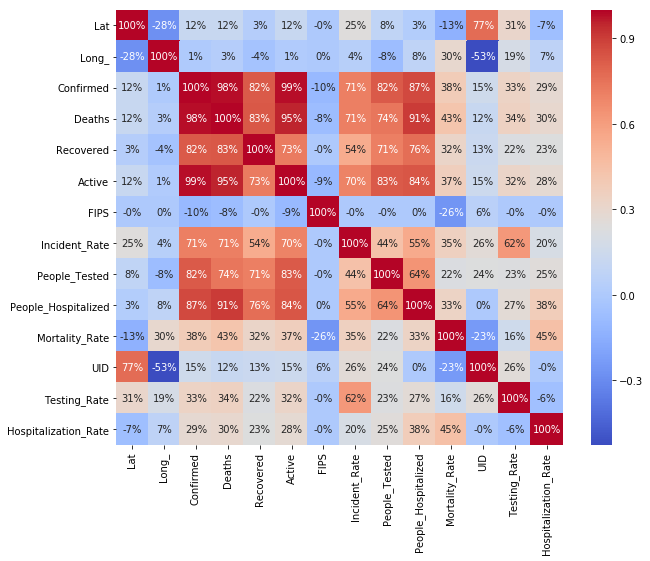

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='coolwarm')
plt.show()

Observation:
    
    1-Confirmed case ,Deaths, Recovered Case, Active, People Hospitalized, People tested, Incident Rate are highly 
    
      positive correlated with each other.
        
    2-Mortality rate is depends on deaths and hospitalized rate.
    
    3-Incident rate is depends on Testing rate.

In [17]:
#seprate the categorical columns and numerical columns
cat_df=[]
num_df=[]
for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df >>> \n\n',cat_df,'\n\nnum_df >>> \n\n',num_df)

cat_df >>> 

 ['Province_State', 'Country_Region', 'ISO3'] 

num_df >>> 

 ['Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate']


Here we see the categorical columns and Numerical columns seprately.

## Exploring the data variable

In [18]:
#Exploring the data variable
for i in df:
    print(i,'\n\t',df[i].unique(),'\n\n')

Province_State 
	 ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming'] 


Country_Region 
	 ['US'] 


Last_Update 
	 ['2020-05-21T02:32:54.000000000'] 


Lat 
	 [ 32.3182      61.3707     -14.271       33.7298      34.9697
  36.1162      39.0598      41.5978      39.3185      36.84008929
  38.8974      27.7663      33.0406    

In Country_Region and Last_Update column there is only specific value present thats why we dropped these columns.

In [19]:
#Making the copy of our origional dataset.
data=df.copy()

In [20]:
#Dropping Country_Region and Last_Update as they have only one value
data.drop(columns=['Country_Region', 'Last_Update'], axis=1, inplace=True)
data.head(3)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,American Samoa,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,ASM,222.857246,14.342541


# Visualization

### Province_State where maximum active cases are present

In [21]:
#Checking the country where maximum confirmed cases are present

most_affected_province=data.groupby(by='Province_State')['Confirmed'].sum().sort_values(ascending=False).reset_index()
most_affected_province

,Province_State,Confirmed
0,New York,354370
1,New Jersey,150776
2,Illinois,100418
3,Massachusetts,88970
4,California,85997
5,Pennsylvania,68126
6,Michigan,53009
7,Texas,51673
8,Florida,47471
9,Maryland,42323


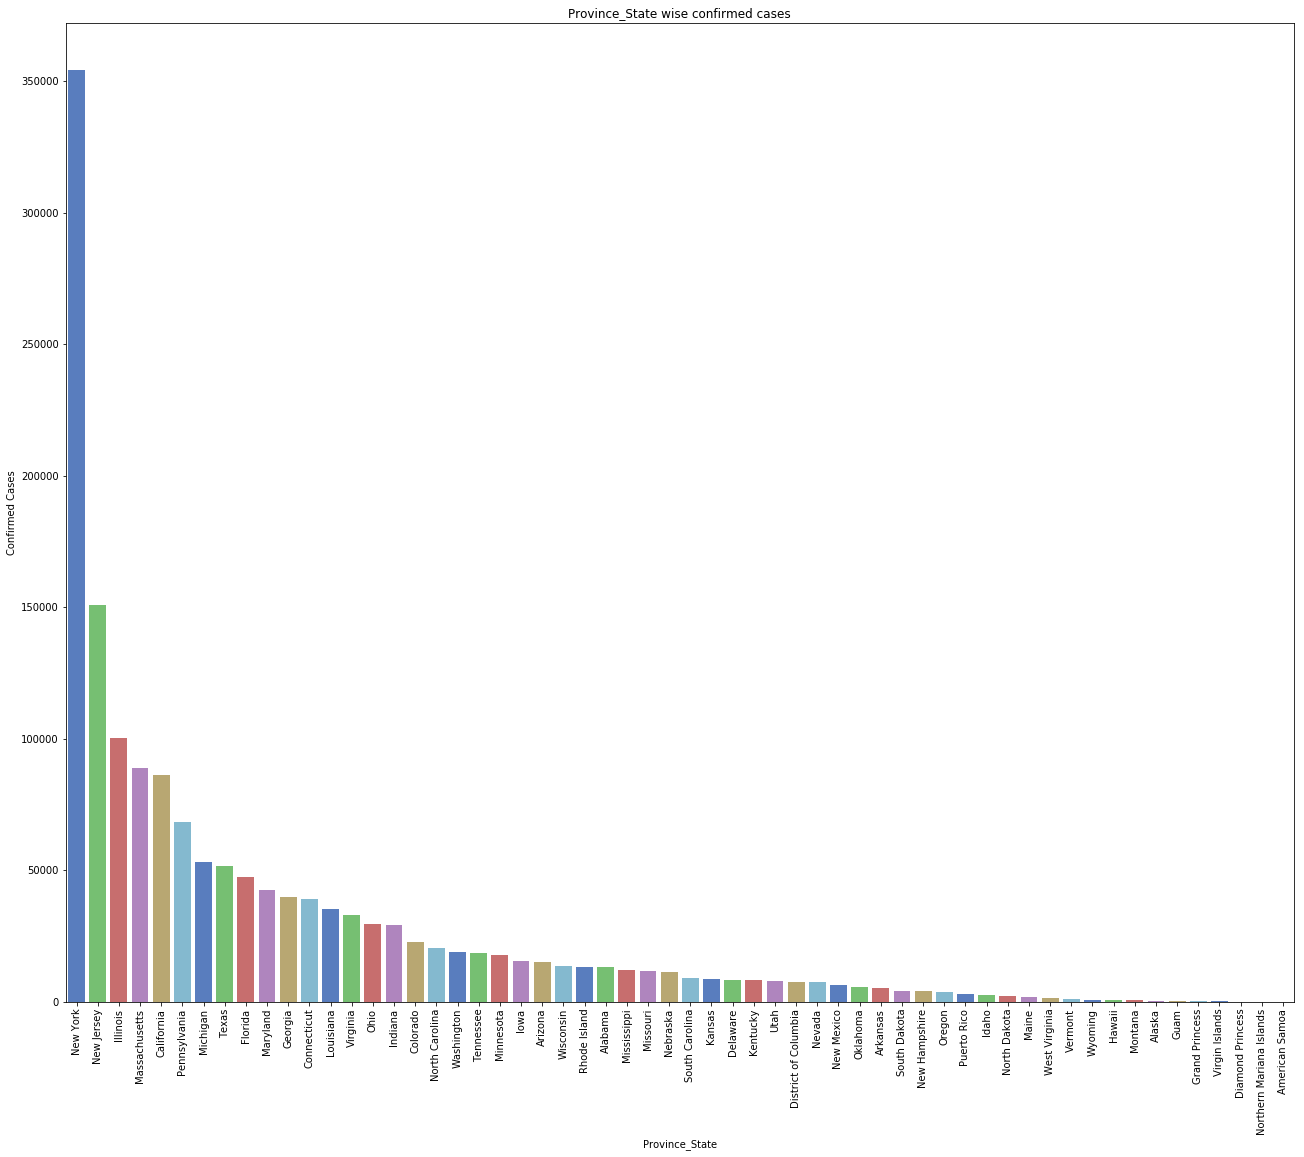

In [22]:
confirmed=pd.DataFrame(most_affected_province)

#Barplot

plt.figure(figsize=(22,18))
sns.barplot(x="Province_State",y="Confirmed",data=confirmed,palette = "muted")
plt.title('Province_State wise confirmed cases')
plt.ylabel("Confirmed Cases")
plt.xticks(rotation='vertical')
plt.show()

### Province_State where maximum Deaths are occured.

In [23]:
#Checking the Province_State where maximum death cases are present

most_death=data.groupby(by='Province_State')['Deaths'].sum().sort_values(ascending=False).reset_index()
most_death

,Province_State,Deaths
0,New York,28636
1,New Jersey,10749
2,Massachusetts,6066
3,Michigan,5060
4,Pennsylvania,4770
5,Illinois,4525
6,Connecticut,3529
7,California,3497
8,Louisiana,2608
9,Maryland,2123


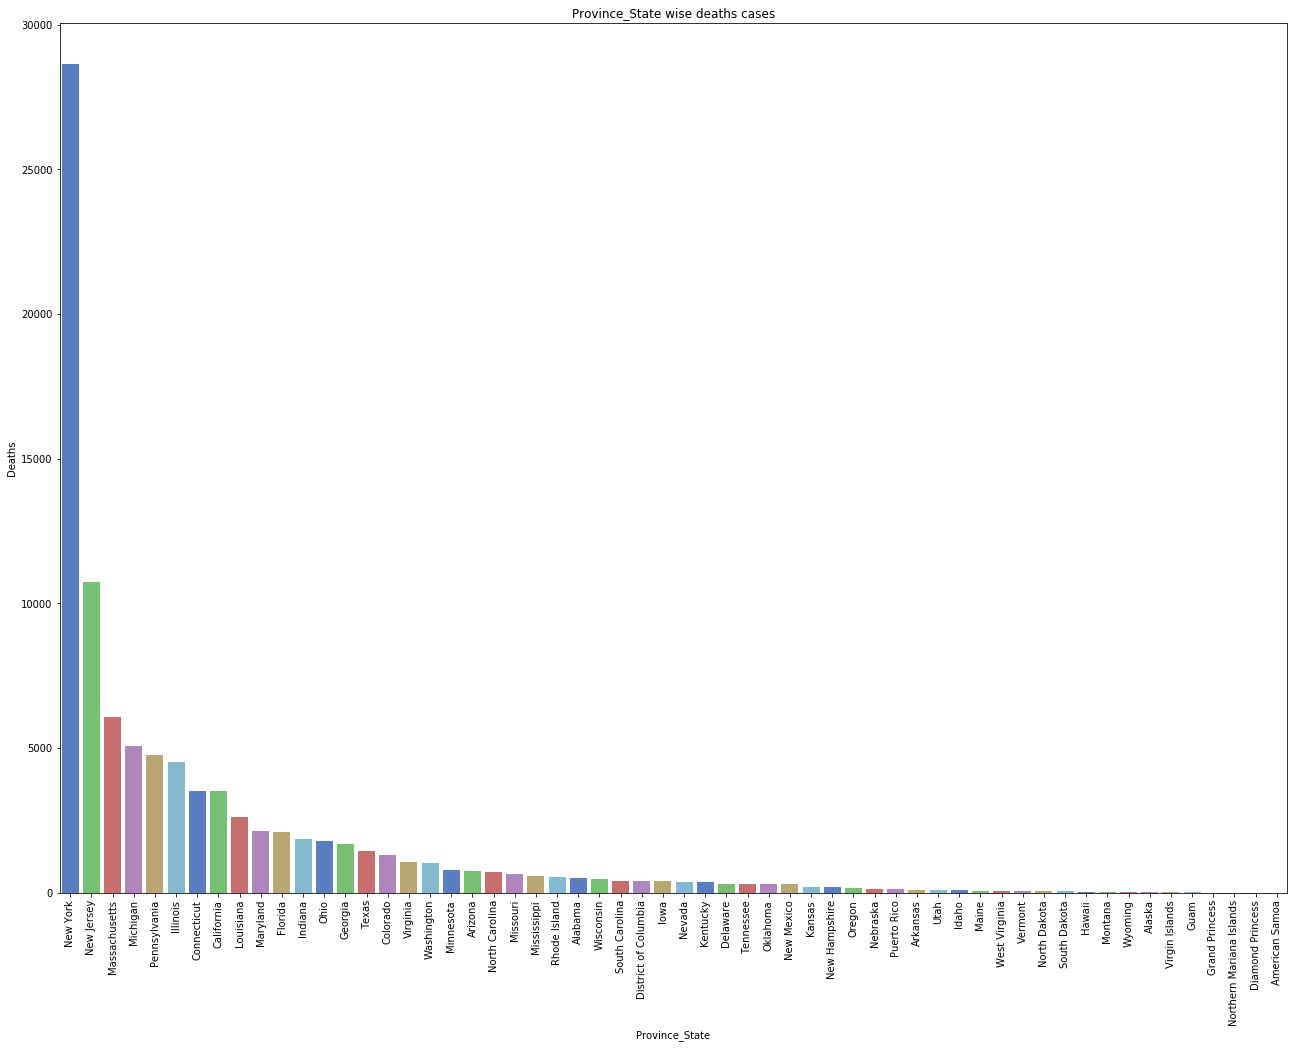

In [24]:
max_death=pd.DataFrame(most_death)

#Barplot

plt.figure(figsize=(22,16))
sns.barplot(x="Province_State",y="Deaths",data=most_death,palette = "muted")
plt.title('Province_State wise deaths cases')
plt.ylabel("Deaths")
plt.xticks(rotation='vertical')
plt.show()

### Province_State where maximum recovered patient

In [25]:
#Checking the Provience_State where maximum recovered cases are present

max_recovered=data.groupby(by='Province_State')['Recovered'].sum().sort_values(ascending=False).reset_index()
max_recovered

,Province_State,Recovered
0,New York,61886.000000
1,Texas,30341.000000
2,Michigan,28234.000000
3,Louisiana,26249.000000
4,New Jersey,23945.000000
5,Minnesota,12227.000000
6,Tennessee,11783.000000
7,North Carolina,11637.000000
8,Iowa,8362.000000
9,Wisconsin,7728.000000


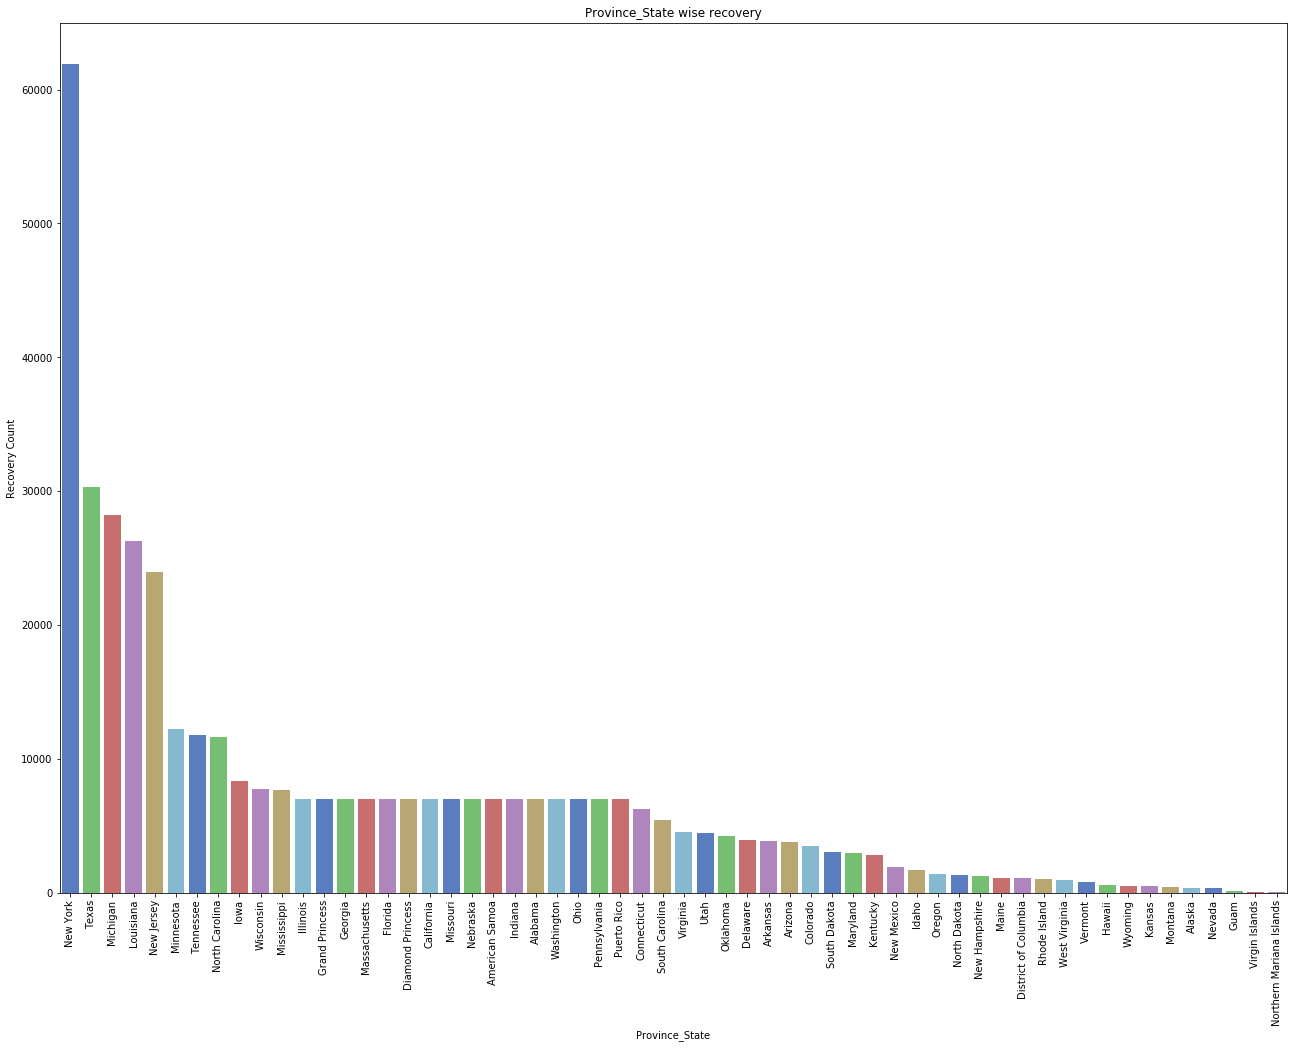

In [26]:
recovered=pd.DataFrame(max_recovered)

#Barplot

plt.figure(figsize=(22,16))
sns.barplot(x="Province_State",y="Recovered",data=recovered,palette = "muted")
plt.title('Province_State wise recovery')
plt.ylabel("Recovery Count")
plt.xticks(rotation='vertical')
plt.show()

### Province_State where maximum Active cases are present

In [27]:
#Checking the Province_State where maximum active cases are present

max_active=data.groupby(by='Province_State')['Active'].sum().sort_values(ascending=False).reset_index()
max_active

,Province_State,Active
0,New York,263848.0
1,New Jersey,116082.0
2,Illinois,95893.0
3,Massachusetts,82904.0
4,California,82500.0
5,Pennsylvania,63356.0
6,Florida,45375.0
7,Georgia,38104.0
8,Maryland,37207.0
9,Connecticut,29224.0


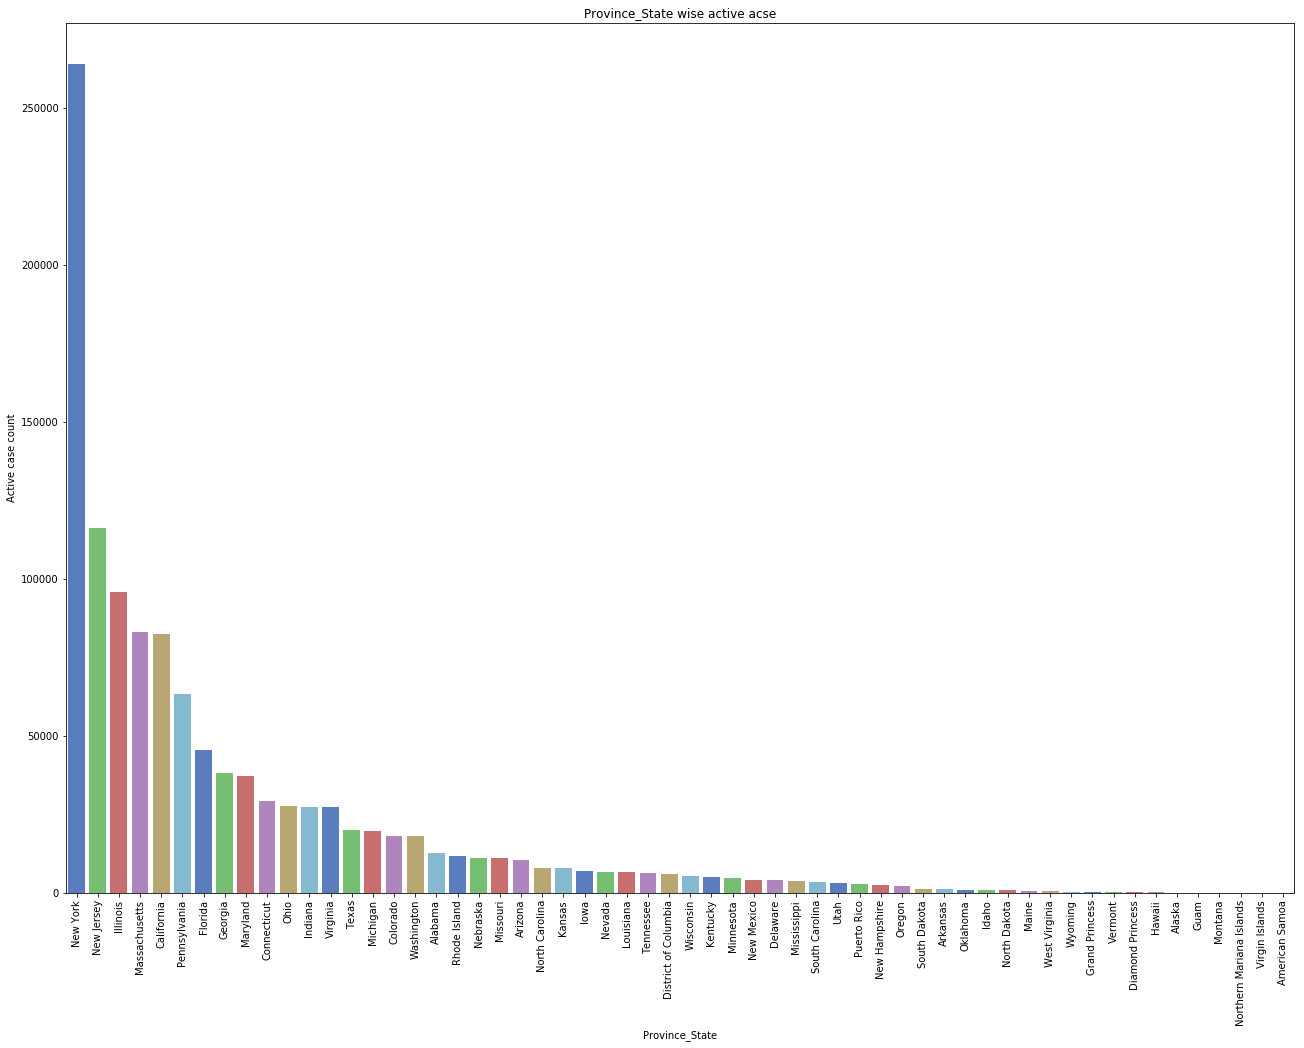

In [28]:
active_cases=pd.DataFrame(max_active)

#Barplot

plt.figure(figsize=(22,16))
sns.barplot(x="Province_State",y="Active",data=active_cases,palette = "muted")
plt.title('Province_State wise active acse')
plt.ylabel("Active case count")
plt.xticks(rotation='vertical')
plt.show()

### Province_State where Incident Rate is maximum

In [29]:
#Checking the Province_State where Incident_Rate is maximum

max_incident_rate=data.groupby(by='Province_State')['Incident_Rate'].sum().sort_values(ascending=False).reset_index()
max_incident_rate

,Province_State,Incident_Rate
0,New York,1821.620216
1,New Jersey,1697.509285
2,Massachusetts,1290.822797
3,Rhode Island,1260.760024
4,Connecticut,1094.357902
5,District of Columbia,1069.927127
6,Delaware,841.476990
7,Illinois,792.451219
8,Louisiana,759.680898
9,Maryland,700.053592


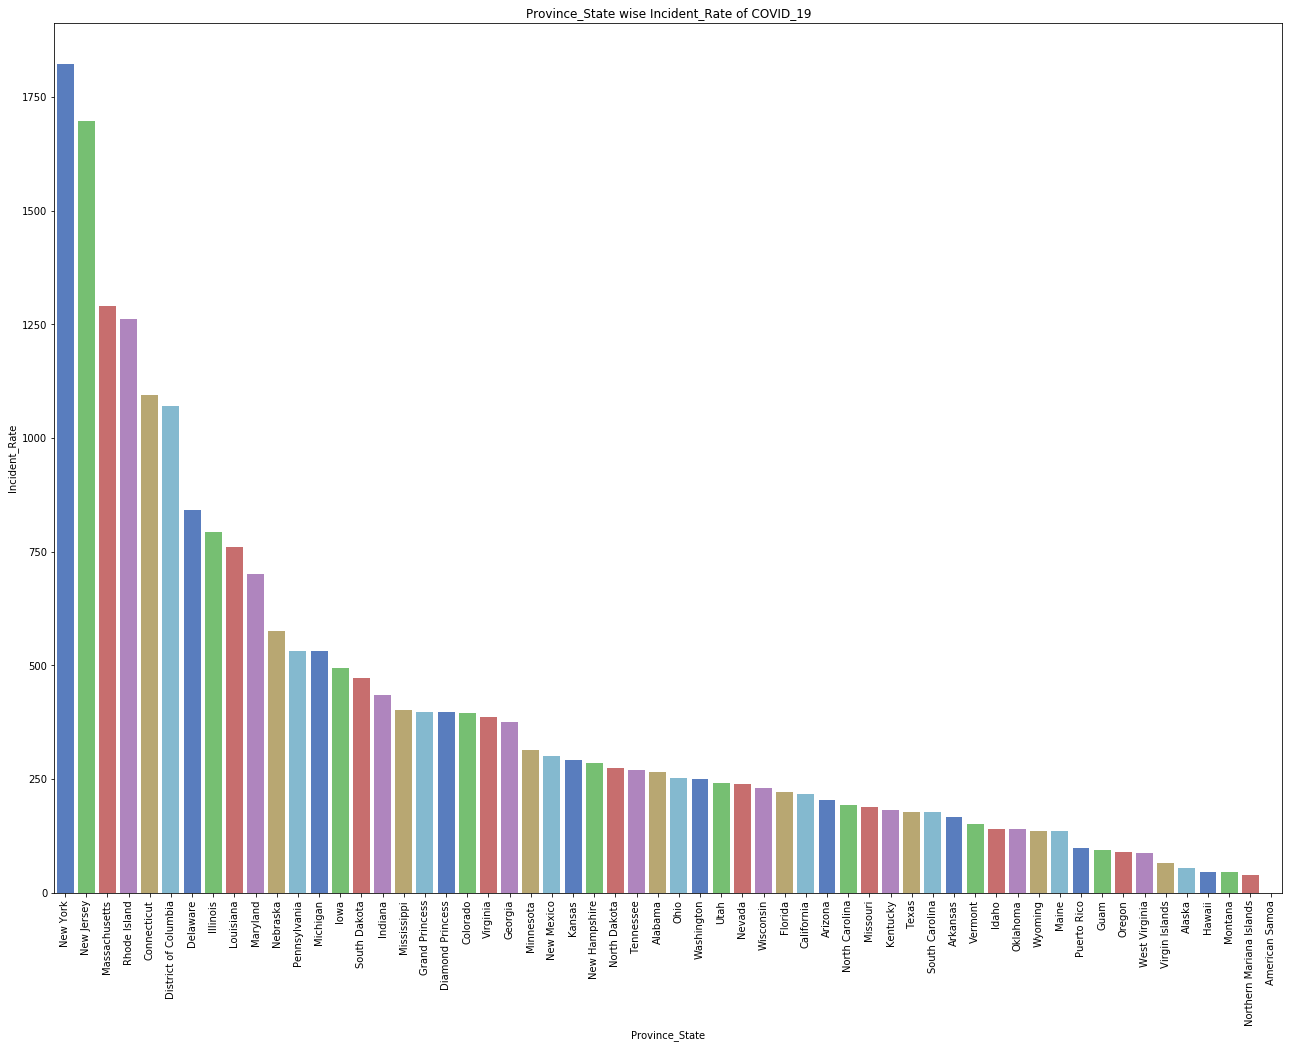

In [30]:
incident_rate=pd.DataFrame(max_incident_rate)

#Barplot

plt.figure(figsize=(22,16))
sns.barplot(x="Province_State",y="Incident_Rate",data=incident_rate,palette = "muted")
plt.title('Province_State wise Incident_Rate of COVID_19')
plt.ylabel("Incident_Rate")
plt.xticks(rotation='vertical')
plt.show()

### Province_State where maximum people tested

In [31]:
#Checking the Province_State where maximum people test

max_people_tested=data.groupby(by='Province_State')['People_Tested'].sum().sort_values(ascending=False).reset_index()
max_people_tested

,Province_State,People_Tested
0,New York,1.505836e+06
1,California,1.380120e+06
2,Florida,7.713480e+05
3,Texas,7.702410e+05
4,Illinois,6.427130e+05
5,New Jersey,5.313430e+05
6,Massachusetts,4.899530e+05
7,Michigan,4.370720e+05
8,Georgia,4.029400e+05
9,Tennessee,3.540130e+05


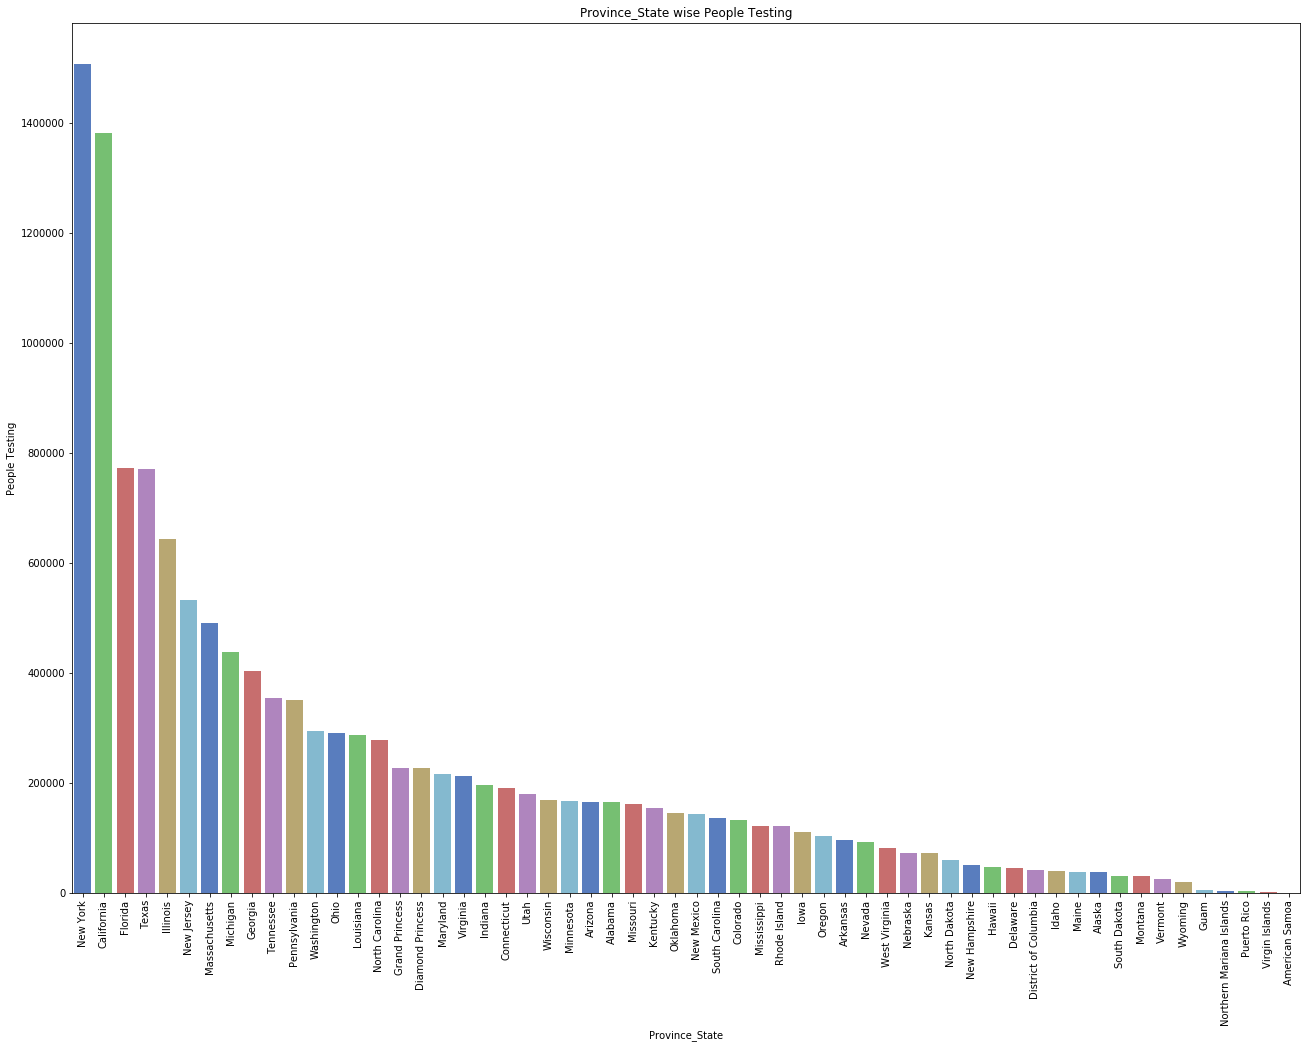

In [32]:
people_tested=pd.DataFrame(max_people_tested)

#Barplot

plt.figure(figsize=(22,16))
sns.barplot(x="Province_State",y="People_Tested",data=people_tested,palette = "muted")
plt.title('Province_State wise People Testing')
plt.ylabel("People Testing")
plt.xticks(rotation='vertical')
plt.show()

### Province_State where maximum Hospitalized people

In [33]:
#Checking the Province_State where maximum people hospitalized

hospitalized_people=data.groupby(by='Province_State')['People_Hospitalized'].sum().sort_values(ascending=False).reset_index()
hospitalized_people

,Province_State,People_Hospitalized
0,New York,76410.000000
1,Connecticut,10946.000000
2,Florida,8934.000000
3,Massachusetts,8897.000000
4,Maryland,7393.000000
5,Georgia,7107.000000
6,Virginia,6059.000000
7,Ohio,5198.000000
8,Nevada,4897.454545
9,Diamond Princess,4897.454545


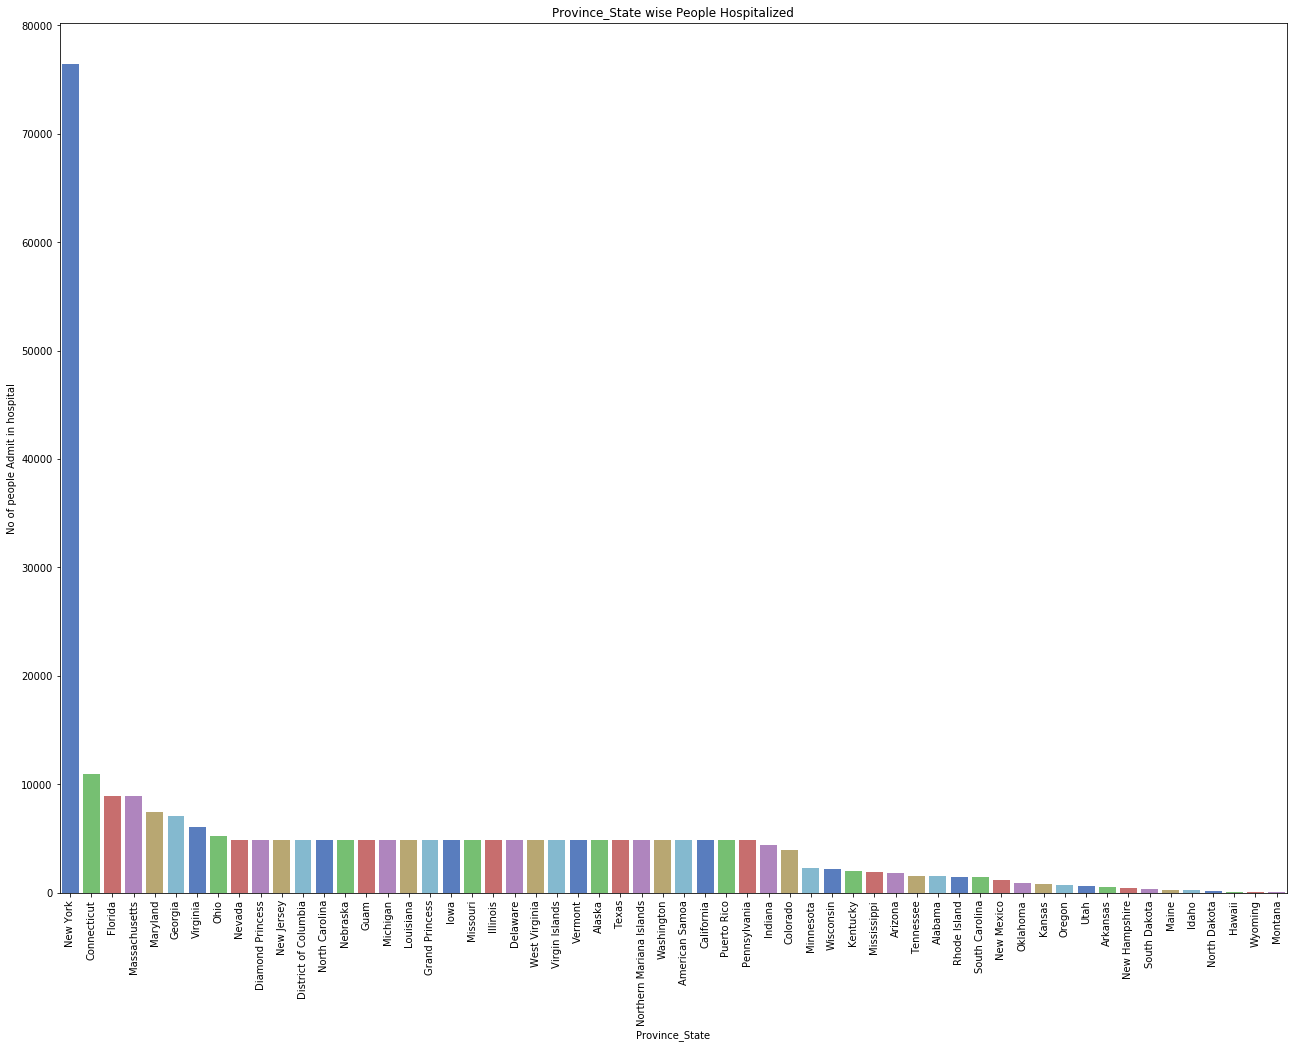

In [34]:
max_people_hospitalized=pd.DataFrame(hospitalized_people)

#Barplot

plt.figure(figsize=(22,16))
sns.barplot(x="Province_State",y="People_Hospitalized",data=max_people_hospitalized,palette = "muted")
plt.title('Province_State wise People Hospitalized')
plt.ylabel("No of people Admit in hospital")
plt.xticks(rotation='vertical')
plt.show()

### Province_State where maximum Mortality Rate

In [35]:
#Checking the Province_State where maximum Mortality Rate occur
max_mortality_rate=data.groupby(by='Province_State')['Mortality_Rate'].sum().sort_values(ascending=False).reset_index()
max_mortality_rate

,Province_State,Mortality_Rate
0,Michigan,9.545549
1,Northern Mariana Islands,9.523810
2,Connecticut,9.044775
3,Virgin Islands,8.695652
4,New York,8.080819
5,Louisiana,7.384755
6,New Jersey,7.129119
7,Pennsylvania,7.001732
8,Massachusetts,6.818029
9,Indiana,6.367425


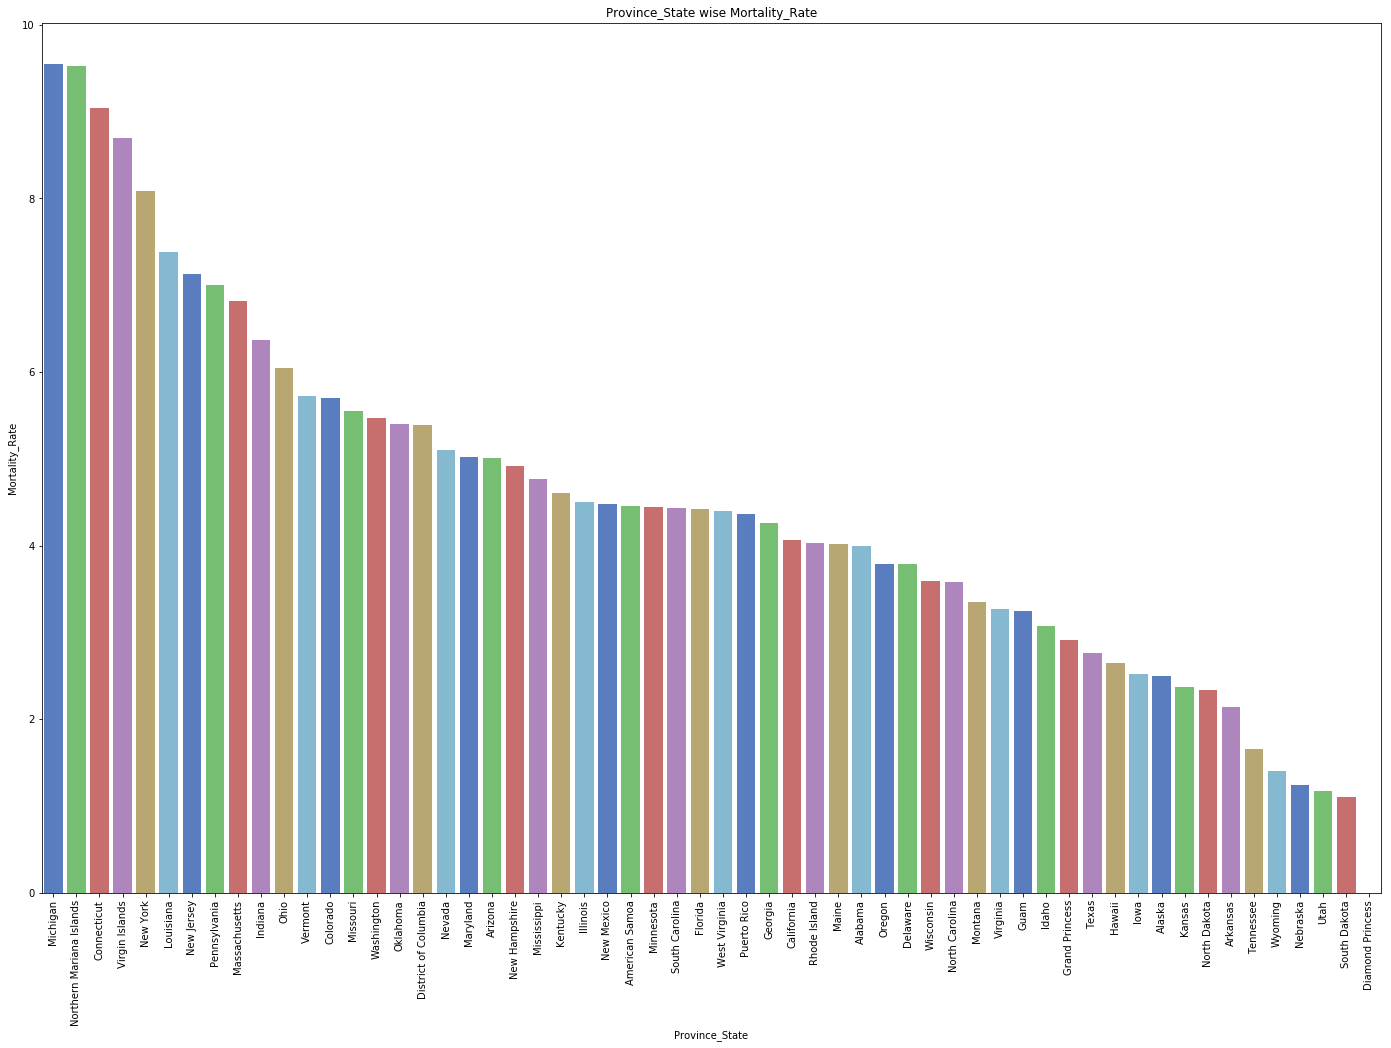

In [36]:
mortality_rate=pd.DataFrame(max_mortality_rate)

#Barplot

plt.figure(figsize=(24,16))
sns.barplot(x="Province_State",y="Mortality_Rate",data=mortality_rate,palette = "muted")
plt.title('Province_State wise Mortality_Rate')
plt.ylabel("Mortality_Rate")
plt.xticks(rotation='vertical')
plt.show()

### Province_State with maximum testing rate

In [37]:
#Checking the Province_State where maximum Testing Rate
max_testing_rate=data.groupby(by='Province_State')['Testing_Rate'].sum().sort_values(ascending=False).reset_index()
max_testing_rate

,Province_State,Testing_Rate
0,Rhode Island,11377.424693
1,North Dakota,7768.396797
2,New York,7740.670204
3,Massachusetts,7108.491647
4,Northern Mariana Islands,6921.877267
5,New Mexico,6783.862680
6,Louisiana,6151.487891
7,New Jersey,5982.117023
8,District of Columbia,5727.106946
9,Utah,5604.065930


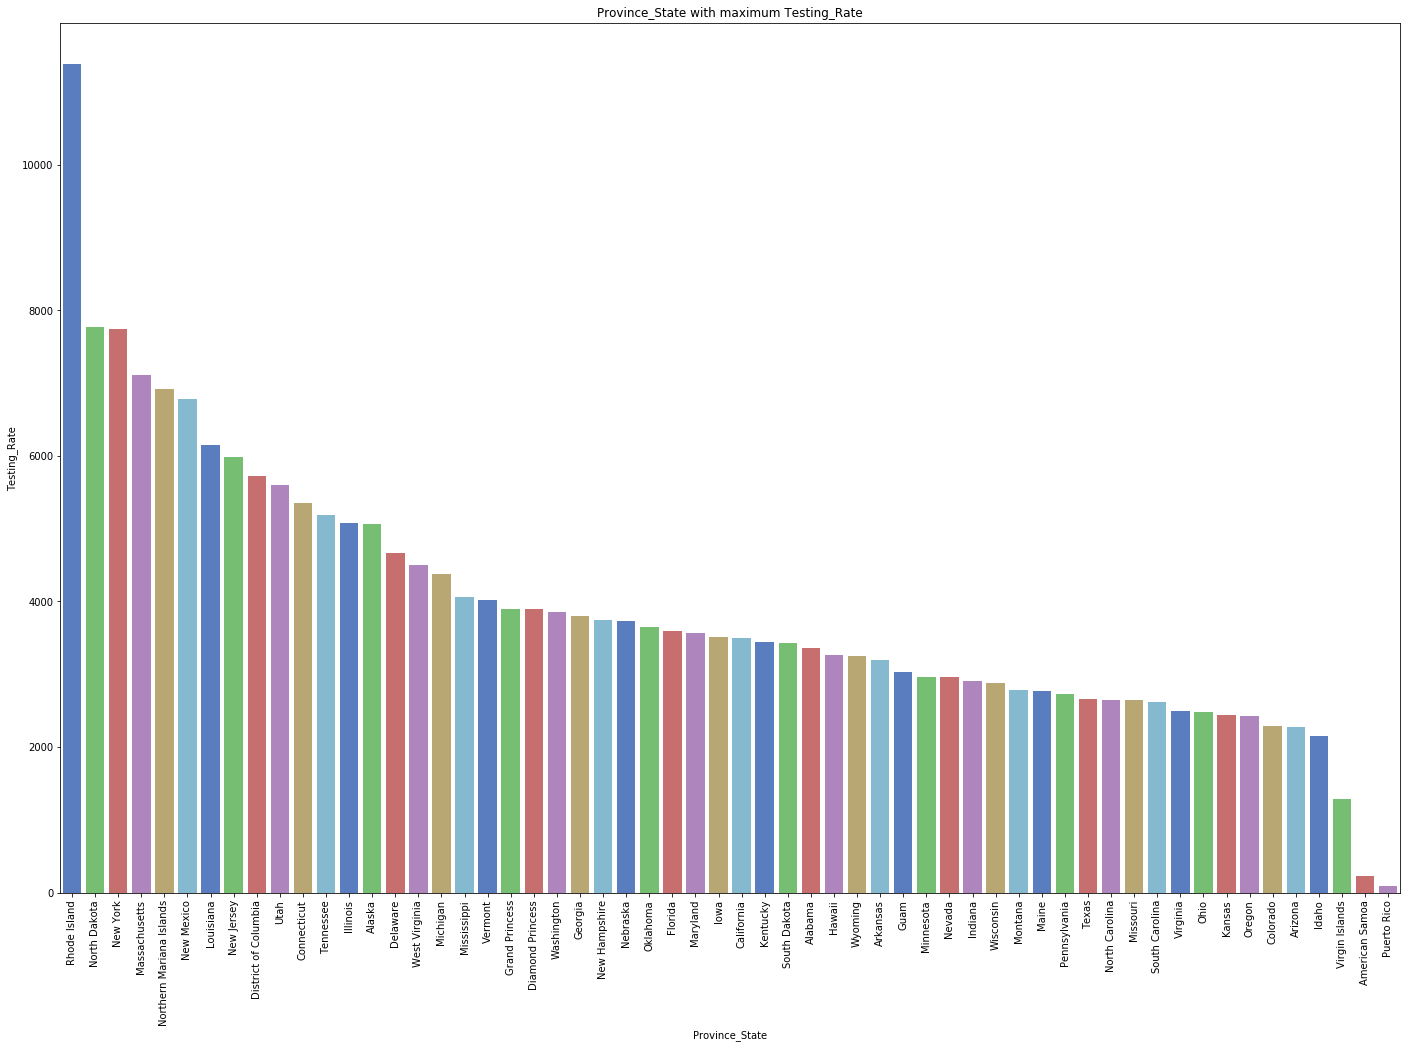

In [38]:
max_test=pd.DataFrame(max_testing_rate)

#Barplot

plt.figure(figsize=(24,16))
sns.barplot(x="Province_State",y="Testing_Rate",data=max_test,palette = "muted")
plt.title('Province_State with maximum Testing_Rate')
plt.ylabel("Testing_Rate")
plt.xticks(rotation='vertical')
plt.show()

USA    53
MNP     1
PRI     1
GUM     1
ASM     1
VIR     1
Name: ISO3, dtype: int64


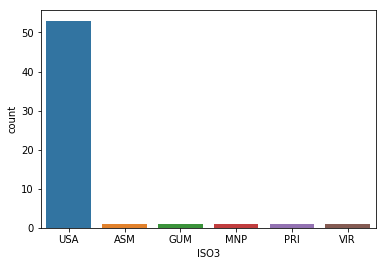

In [39]:
#Countplot of ISO3
sns.countplot(x='ISO3', data=data)

print(data['ISO3'].value_counts())

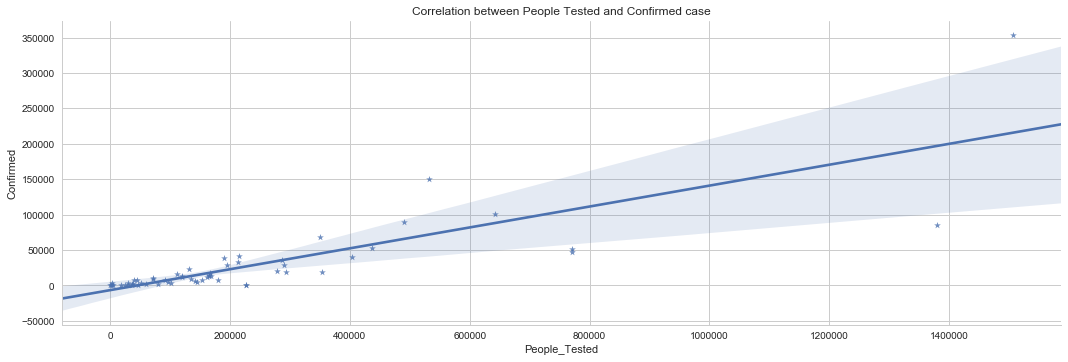

In [40]:
#Correlation between number of people tested and Confirmed cases..
sns.set(style='whitegrid')
sns.lmplot(x='People_Tested',y='Confirmed',data=data,markers=['*'],aspect=3)
plt.title('Correlation between People Tested and Confirmed case')
plt.show()

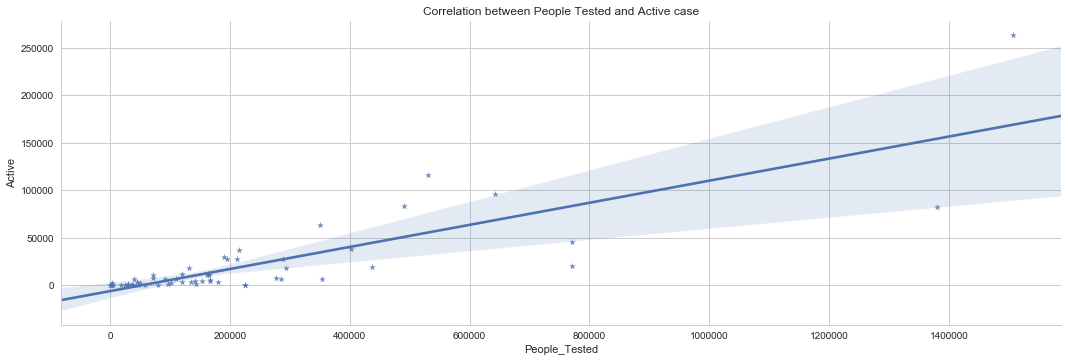

In [41]:
#Correlation between number of people tested and active cases..
sns.set(style='whitegrid')
sns.lmplot(x='People_Tested',y='Active',data=data,markers=['*'],aspect=3)
plt.title('Correlation between People Tested and Active case')
plt.show()

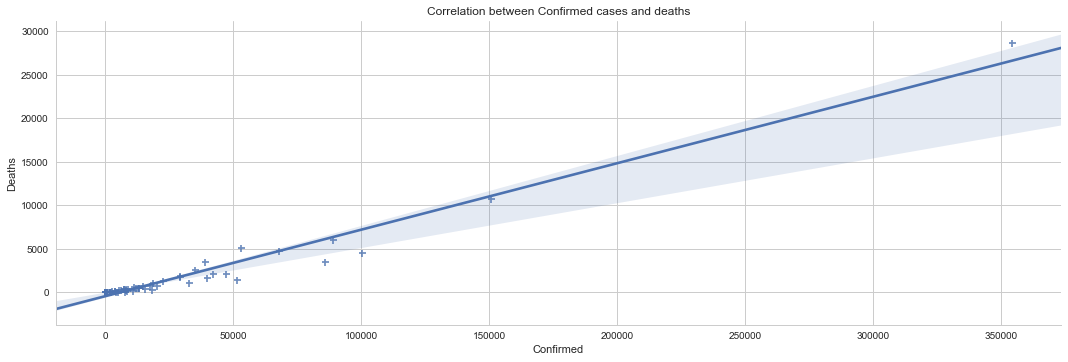

In [42]:
#Correlation between Confirmed cases and death.
sns.set(style='whitegrid')
sns.lmplot(x='Confirmed',y='Deaths',data=data,markers=['+'],aspect=3)
plt.title('Correlation between Confirmed cases and deaths')
plt.show()

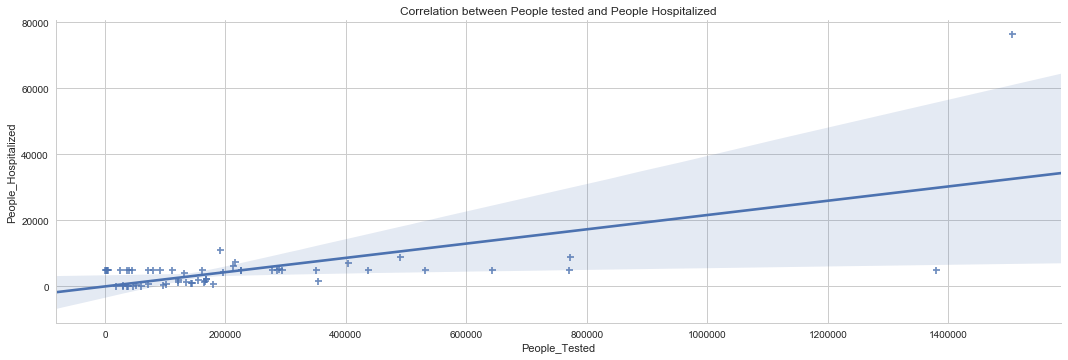

In [43]:
#Correlation between People tested and people hospitalized.
sns.set(style='whitegrid')
sns.lmplot(x='People_Tested',y='People_Hospitalized',data=data,markers=['+'],aspect=3)
plt.title('Correlation between People tested and People Hospitalized')
plt.show()

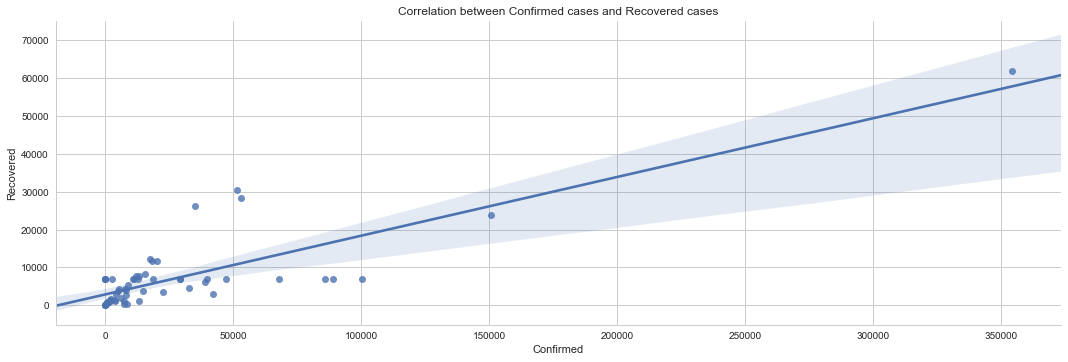

In [44]:
#Correlation between Confirmed cases and Recovered cases.
sns.set(style='whitegrid')
sns.lmplot(x='Confirmed',y='Recovered',data=data,markers=['o'],aspect=3)
plt.title('Correlation between Confirmed cases and Recovered cases')
plt.show()

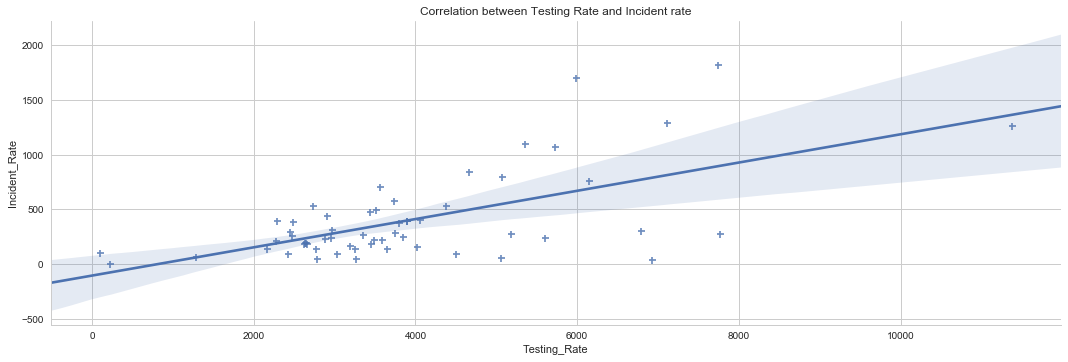

In [45]:
#Correlation between Incident Rate and Testing rate.
sns.set(style='whitegrid')
sns.lmplot(x='Testing_Rate',y='Incident_Rate',data=data,markers=['+'],aspect=3)
plt.title('Correlation between Testing Rate and Incident rate')
plt.show()

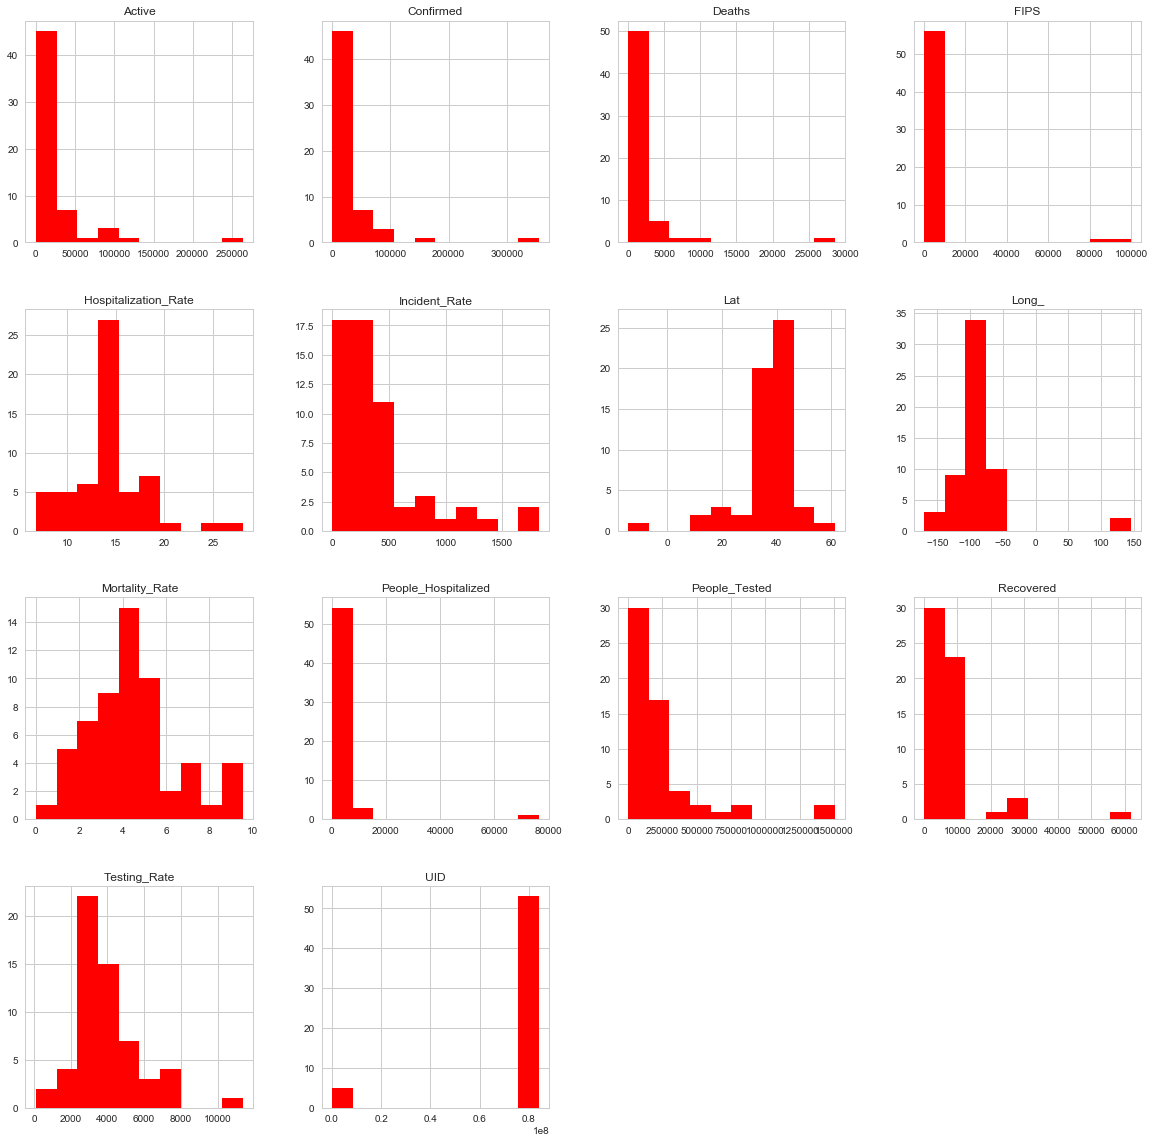

In [46]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='r')
plt.show()

Observation:
    
    1-Several distributions are right-skewed (e.g. Incident_Rate,People_Tested ).
    
    2.Mortality_Rate and Testing_Rate distribution is a slightly right-skewed normal distribution.
    
    3.FIPS and UID are constant values for approx all cases. They're likely to be redundant features.

## To check the skewness

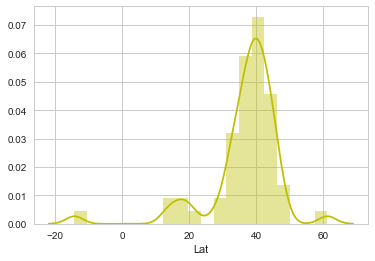

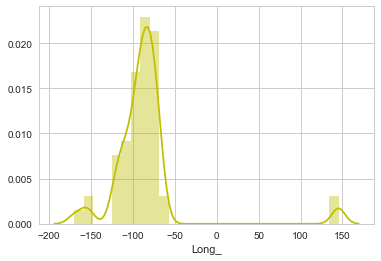

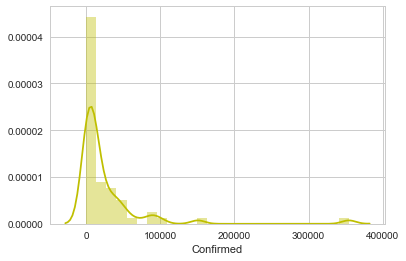

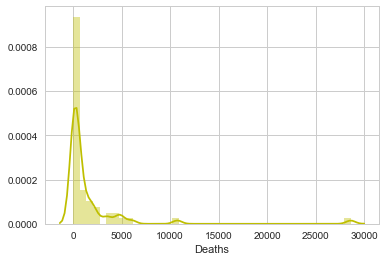

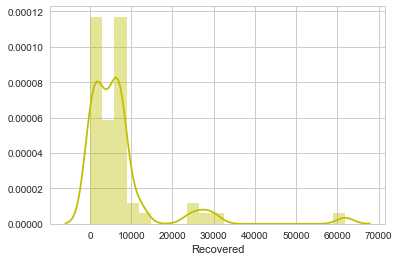

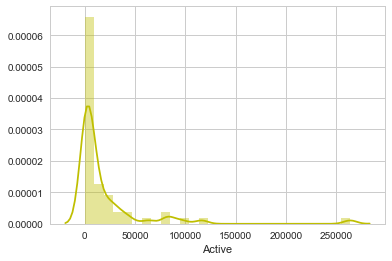

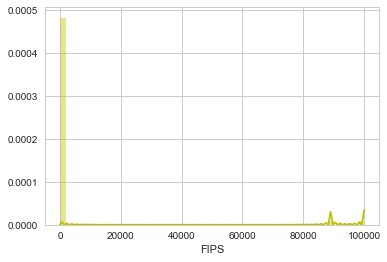

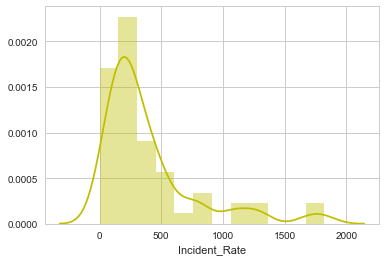

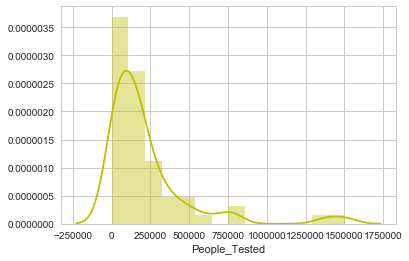

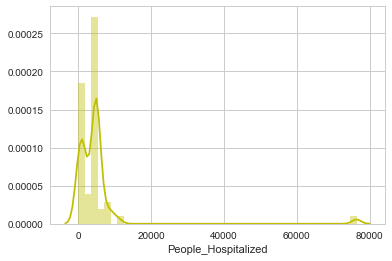

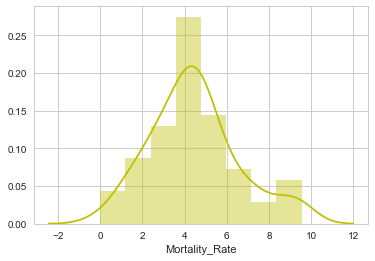

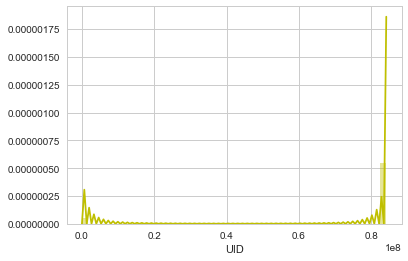

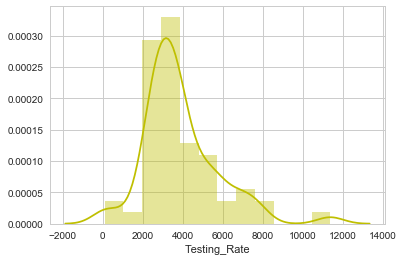

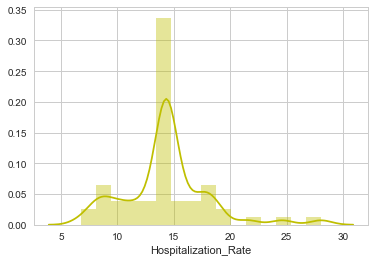

In [47]:
#Distribution plot
#In for loop we give describe() function to descriminate numeric columns from categorical columns.
#Because describe() function give the summary of numeric columns
for i in df.describe().columns:
    sns.distplot(df[i],color='y')
    plt.show()

In [48]:
data.skew()

Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [49]:
#Dropping Lattitude and Logitude columns
data.drop(columns=['Lat', 'Long_'], axis=1,inplace=True)

In [50]:
#Lets treat the skewness
import numpy as np
data.skew()
for col in data.skew().index:
    if col in data.describe().columns:
        if data.skew().loc[col]>0.5:
            data[col]=np.sqrt(data[col])
        if data.skew().loc[col]<-0.5:
            data[col]=np.cbrt(data[col])

In [51]:
#Lets again check skewness
data.skew()

Confirmed               1.901107
Deaths                  2.496421
Recovered               1.431056
Active                  1.818910
FIPS                    5.237818
Incident_Rate           0.924150
People_Tested           1.182962
People_Hospitalized     3.148527
Mortality_Rate          0.496115
UID                    -3.027680
Testing_Rate           -0.261124
Hospitalization_Rate    0.211792
dtype: float64

## Plotting Outliers

In [52]:
#seprate the categorical columns and numerical columns
cat_df=[]
num_df=[]
for i in data.columns:
    if data[i].dtype==object:
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df1',cat_df)
print('\n')
print('num_df1',num_df)

cat_df1 ['Province_State', 'ISO3']


num_df1 ['Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate']


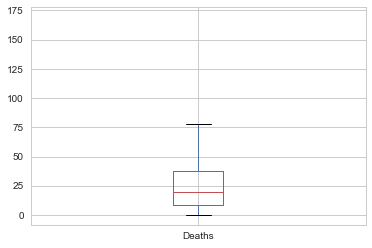

In [53]:
data['Deaths'].plot.box()

## Removing Outliers

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(data[num_df]))
z

array([[9.29654060e-02, 1.65723943e-01, 2.90041995e-01, 1.11201842e-01,
        2.68659634e-01, 1.85359224e-01, 5.61394408e-03, 5.39348860e-01,
        2.18727182e-01, 3.07090457e-01, 1.63244684e-01, 7.62849583e-01],
       [9.77608586e-01, 8.42674726e-01, 1.15999637e+00, 9.51328627e-01,
        2.61144831e-01, 1.21400590e+00, 8.46327095e-01, 2.92274394e-01,
        9.36418161e-01, 3.07090471e-01, 6.90911945e-01, 6.48736552e-02],
       [1.16562490e+00, 9.51422596e-01, 2.90041995e-01, 1.01410982e+00,
        1.46272019e-01, 2.06859362e+00, 1.57143551e+00, 2.92274394e-01,
        4.23371775e-16, 3.29394091e+00, 2.93463679e+00, 6.48736552e-02],
       [1.93100807e-02, 1.15238760e-02, 2.07504744e-01, 1.04125448e-02,
        2.50517295e-01, 4.16791093e-01, 1.04630441e-02, 4.41369809e-01,
        2.63675605e-01, 3.07090500e-01, 8.23372934e-01, 5.88855161e-01],
       [5.01517071e-01, 5.95699023e-01, 1.93222157e-01, 6.89286253e-01,
        2.46234469e-01, 5.82402298e-01, 3.75342335e-01, 9.50

In [55]:
threshold=3
print(np.where(z>3))

(array([ 2,  5,  7,  9, 13, 14, 36, 36, 36, 36, 36, 36, 39, 44, 44, 52],
      dtype=int64), array([ 9,  6, 11,  4,  4,  9,  0,  1,  2,  3,  6,  7,  9,  9, 10,  9],
      dtype=int64))


In [56]:
new_data=data[(z<3).all(axis=1)]

In [57]:
print(data.shape,'\t\t',new_data.shape)

(58, 14) 		 (48, 14)


In [58]:
data=new_data

Now all the outliers are removed.

## Model Training

In [59]:
data.head(3)

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,114.245350,22.847319,83.710385,111.937483,1.000000,16.315463,405.524352,38.639358,3.999387,437.951916,USA,57.913232,3.382138
1,Alaska,20.024984,3.162278,18.761663,6.244998,1.414214,7.403749,192.470777,69.981816,2.493766,437.951917,USA,71.161366,3.787155
3,Arizona,122.090131,27.331301,61.424751,101.911727,2.000000,14.310445,406.737016,42.332021,5.011405,437.951921,USA,47.674515,3.467276


In [60]:
#Splitting the data into input and output variable.
x=data.drop(columns=['Active'],axis=1)
x.head(3)

,Province_State,Confirmed,Deaths,Recovered,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,114.245350,22.847319,83.710385,1.000000,16.315463,405.524352,38.639358,3.999387,437.951916,USA,57.913232,3.382138
1,Alaska,20.024984,3.162278,18.761663,1.414214,7.403749,192.470777,69.981816,2.493766,437.951917,USA,71.161366,3.787155
3,Arizona,122.090131,27.331301,61.424751,2.000000,14.310445,406.737016,42.332021,5.011405,437.951921,USA,47.674515,3.467276


In [61]:
y=data['Active']
y.head()

0    111.937483
1      6.244998
3    101.911727
4     32.310989
6    134.238594
Name: Active, dtype: float64

In [62]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(48, 13) 		 (48,)


In [63]:
#Reshaping target variable

y=y.values.reshape(-1,1)

In [64]:
# Transform Non numeric columns into Numeric columns in input variable

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in x.columns:
    if x[column].dtype==np.number:
        continue
    x[column]=le.fit_transform(x[column])

In [65]:
x.head(3)

,Province_State,Confirmed,Deaths,Recovered,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,114.245350,22.847319,83.710385,1.000000,16.315463,405.524352,38.639358,3.999387,437.951916,0,57.913232,3.382138
1,1,20.024984,3.162278,18.761663,1.414214,7.403749,192.470777,69.981816,2.493766,437.951917,0,71.161366,3.787155
3,2,122.090131,27.331301,61.424751,2.000000,14.310445,406.737016,42.332021,5.011405,437.951921,0,47.674515,3.467276


In [66]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [67]:
#Scaling in target variables
from sklearn.preprocessing import MinMaxScaler
ss=StandardScaler()
y=ss.fit_transform(y)

In [68]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [69]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(38, 13) 		 (10, 13)


In [70]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(38, 1) 	 (10, 1)


In [71]:
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [72]:
# All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is: 0.9836344843821104
MAE: 0.1685271694029835
MSE: 0.05430007658801589
RMSE: 0.23302376828988045
R2_score: 0.9392662765049717
*****************************************************************************************


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.8901319099103889
MAE: 0.3481586183620854
MSE: 0.23565699429000425
RMSE: 0.48544515065041516
R2_score: 0.7364216106089743
*****************************************************************************************


Score of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [74]:
# Cross Validate All Algorithm by using for loop
from sklearn.model_selection import cross_val_score

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Score: [0.84601073 0.98343527 0.91959729 0.98021454 0.89968159]
Mean Score: 0.9257878810771285
Standard deviation: 0.051710226782639576
************************************************************************************************


Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Score: [0.60346894 0.64497744 0.55576278 0.86556096 0.63767713]
Mean Score: 0.6614894498924848
Standard deviation: 0.10679827717838246
************************************************************************************************


Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_sta

### Ridge model is giving best score and r2_score and also it is not suffering from underfitting and overfitting.

In [75]:
#Using GridSearchCV to find the best parameter for Ridge model
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[0.001,0.01,1],'random_state':range(42,55)}
ridge=Ridge()
best=GridSearchCV(ridge,parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 1, 'random_state': 42}

In [76]:
#Ridge model with its best parameters

ridge=Ridge(alpha=1,random_state=42)

ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predridge=ridge.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predridge))
print('Mean squared error:',mean_squared_error(y_test,predridge))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predridge)))
print('\n')
print("r2_score:",r2_score(y_test,predridge))
print('\n')  

Score: 0.9812160004982544


Mean absolute error: 0.14954525830335652
Mean squared error: 0.04799030875700295
Root Mean Squared Error: 0.21906690475058743


r2_score: 0.9463236458282986




In [77]:
#Cross Validate Ridge Model

score=cross_val_score(ridge,x,y,cv=5,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.94833881 0.97805596 0.94585891 0.97572049 0.94716735]
Mean Score: 0.9590283023120778
Standard deviation: 0.014622318564920026


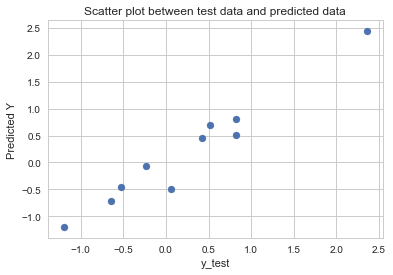

In [78]:
#Plotting scatter plot between test data and predicted data for Ridge model
sns.set(style='whitegrid')
plt.scatter(y_test,predridge)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("Scatter plot between test data and predicted data")
plt.show()

In [79]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(ridge,'USA_covid_19_ridge.pkl')

['USA_covid_19_ridge.pkl']